In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
#importing the csv file

df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [127]:
#1. cleaning data
#checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [128]:
#INFERENCE: No null value found 

In [129]:
#2. Which city has hightest number of sale counts recorded

In [130]:
g = df.groupby('City').count().sort_values(by=['Sales'],ascending=False)['Sales']
g.head(20)

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: Sales, dtype: int64

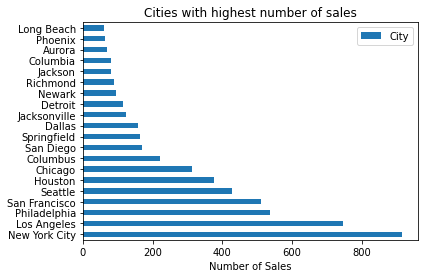

<Figure size 720x576 with 0 Axes>

In [131]:
df['City'].value_counts()[:20].plot(kind='barh')
plt.title('Cities with highest number of sales')
plt.xlabel('Number of Sales')
plt.legend()
plt.figure(figsize=(10,8))
plt.show()
#INFERENCE: New York Records the highest sales occurances

In [132]:
#3. Find the cities generating profits and cities generating losses

In [133]:
pos_prof = []
neg_prof = []
cities_prof = dict()

for city in df['City'].unique():
    # considering the average profit of all the instances of the city
    mean_prof = df['Profit'][df['City'] == city].mean()
    cities_prof[city] = mean_prof
    if mean_prof <= 0:
        neg_prof.append(city)
    else:
        pos_prof.append(city)
        

total_cities = df['City'].unique().shape[0]
 
print(f"Number of Cities with Positive Profit: {len(pos_prof)}")
print(f"Number of Cities with Negative Profit: {len(neg_prof)}")
print()
print(f"Percentage of Cities with Positive Profit: {round((len(pos_prof)/total_cities)*100, 2)}%")
print(f"Percentage of Cities with Negative Profit: {round((len(neg_prof)/total_cities)*100, 2)}%")
print()

def get_mean_profit_of_city(city):
    for key, value in cities_prof.items():
        if key == city:
            return f"Mean profit of {key} is {round(value, 2)}"
    return f"{city} is not found in the sales data!"

get_mean_profit_of_city("Detroit")

#INFERECE: 78.15% of the Cities in the distribution chain had positive profit whereas 21.85% of the cities returned negative profit

Number of Cities with Positive Profit: 415
Number of Cities with Negative Profit: 116

Percentage of Cities with Positive Profit: 78.15%
Percentage of Cities with Negative Profit: 21.85%



'Mean profit of Detroit is 114.62'

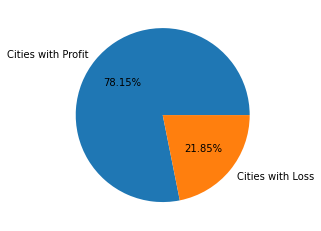

In [134]:
plt.pie([round((len(pos_prof)/total_cities)*100, 2), round((len(neg_prof)/total_cities)*100, 2)], labels=['Cities with Profit', 'Cities with Loss'], autopct='%1.2f%%' )
plt.show()

In [135]:
#4. Find the Top cities with maximum profit and maximum losses

In [136]:
df_prof = pd.DataFrame(list(cities_prof.items()), columns=['city','Profit'])
df_prof.sort_values(by=['Profit'], ascending=False, inplace=True)
df_prof.head(20) #Top 20 Most profitable cities based on average

,city,Profit
312,Jamestown,642.885750
44,Independence,487.831500
240,Lafayette,323.173794
31,Minneapolis,296.721070
233,Appleton,277.383150
73,Morristown,262.603871
493,Burbank,254.844600
427,Lehi,225.831300
473,Beverly,218.306467
99,Warwick,212.759120


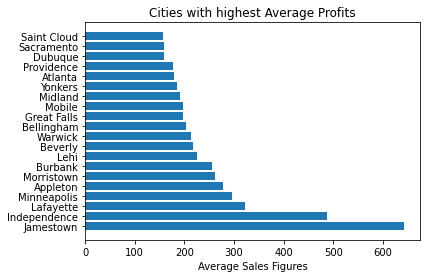

<Figure size 720x576 with 0 Axes>

In [137]:
plt.barh(df_prof['city'].head(20), df_prof['Profit'].head(20))
plt.title('Cities with highest Average Profits')
plt.xlabel('Average Sales Figures')
plt.figure(figsize=(10,8))
plt.show()

In [138]:
df_prof = df_prof[df_prof['Profit']<=0]
df_prof.sort_values(by=['Profit'], ascending=False, inplace=True)
df_prof.head(20) #Top 10 least loss yielding cities on average

,city,Profit
89,Austin,-0.522918
365,Hickory,-0.547800
376,Altoona,-0.591750
348,Bolingbrook,-0.776833
512,Elyria,-1.398400
530,Mason,-1.411733
424,Pensacola,-1.476000
281,Ormond Beach,-1.965600
210,Freeport,-2.008800
93,Tucson,-2.030213


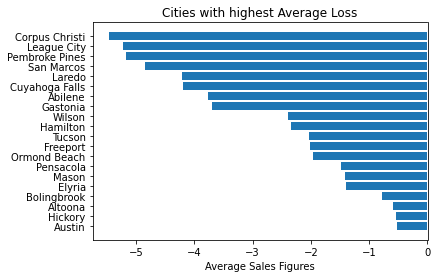

<Figure size 720x576 with 0 Axes>

In [139]:
plt.barh(df_prof['city'].head(20), df_prof['Profit'].head(20))
plt.title('Cities with highest Average Loss')
plt.xlabel('Average Sales Figures')
plt.figure(figsize=(10,8))
plt.show()

In [140]:
df_prof.sort_values(by=['Profit'], ascending=True, inplace=True)
df_prof.head(20) #Top 20 Most Loss Yielding cities on average

,city,Profit
437,Bethlehem,-200.619160
378,Champaign,-182.352000
524,Oswego,-178.709200
171,Round Rock,-169.061614
152,Lancaster,-157.371052
300,Clarksville,-150.764743
64,Medina,-149.227178
140,Burlington,-144.915088
52,San Antonio,-123.712715
420,Yuma,-116.497725


In [141]:
#5. Top 20 profit and loss generating states

In [142]:
neg_prof = []
pos_prof = []
states_prof = dict()

for state in df['State'].unique():
    # considering the average profit of all the instances of the city
    mean_prof = df['Profit'][df['State'] == state].mean()
    states_prof[state] = mean_prof
    if mean_prof <= 0:
        neg_prof.append(city)
    else:
        pos_prof.append(city)


total_states = df['State'].unique().shape[0]
 
print(f"Number of States with Positive Profit: {len(pos_prof)}")
print(f"Number of States with Negative Profit: {len(neg_prof)}")
print()
print(f"Percentage of States with Positive Profit: {round((len(pos_prof)/total_states)*100, 2)}%")
print(f"Percentage of States with Negative Profit: {round((len(neg_prof)/total_states)*100, 2)}%")
print()

def get_mean_profit_of_state(state):
    for key, value in states_prof.items():
        if key == state:
            return f"Mean profit of {key} is {round(value, 2)}"
    return f"{state} is not found in the sales data!"

get_mean_profit_of_state("Florida")

#INFERECE: 79.59% of the States in the distribution chain had positive profit whereas 20.41% of the states returned negative profit


Number of States with Positive Profit: 39
Number of States with Negative Profit: 10

Percentage of States with Positive Profit: 79.59%
Percentage of States with Negative Profit: 20.41%



'Mean profit of Florida is -8.88'

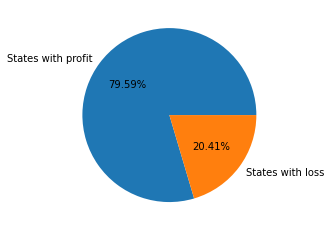

In [143]:
plt.pie([round((len(pos_prof)/total_states)*100, 2), round((len(neg_prof)/total_states)*100, 2)], labels=['States with profit', 'States with loss'], autopct='%1.2f%%')
plt.show()

In [144]:
df_prof = pd.DataFrame(list(states_prof.items()), columns=['State','Profit'])
df_prof.sort_values(by=['Profit'], ascending=False, inplace=True)
round(df_prof.head(20), 2) #Top 20 Most profitable states based on average

,State,Profit
42,Vermont,204.09
34,Rhode Island,130.10
14,Indiana,123.38
37,Montana,122.22
11,Minnesota,121.61
40,District of Columbia,105.96
13,Delaware,103.93
47,Wyoming,100.20
25,Missouri,97.52
12,Michigan,95.93


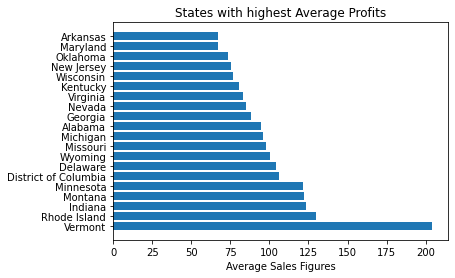

<Figure size 3000x2400 with 0 Axes>

In [145]:
plt.barh(df_prof['State'].head(20), df_prof['Profit'].head(20))
plt.title('States with highest Average Profits')
plt.xlabel('Average Sales Figures')
plt.figure(figsize=(10,8), dpi=300)
plt.show()

In [146]:
df_prof = df_prof[df_prof['Profit']<=0]
df_prof.sort_values(by=['Profit'], ascending=False, inplace=True)
df_prof.head(20) #Top 10 least loss yielding states on average

,State,Profit
2,Florida,-8.875461
21,Oregon,-9.600569
16,Arizona,-15.303235
10,Illinois,-25.625787
5,Texas,-26.121174
9,Pennsylvania,-26.507598
18,Tennessee,-29.189583
3,North Carolina,-30.083985
22,Colorado,-35.867351
24,Ohio,-36.186304


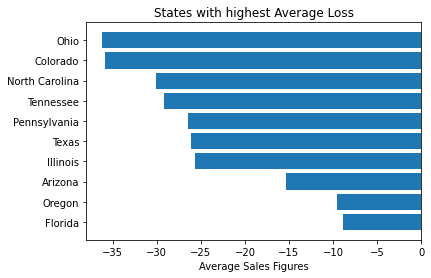

<Figure size 720x576 with 0 Axes>

In [147]:
plt.barh(df_prof['State'].head(20), df_prof['Profit'].head(20))
plt.title('States with highest Average Loss')
plt.xlabel('Average Sales Figures')
plt.figure(figsize=(10,8))
plt.show()

In [149]:
#6. Find which category of items are sold the most from the inventory

In [201]:
cat_gs = df.groupby('Category').count()['Sales']
cat_gs

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Sales, dtype: int64

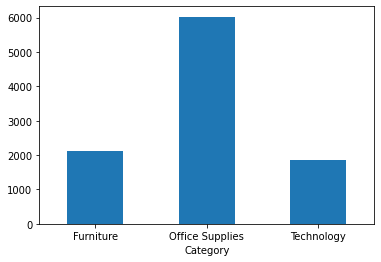

In [196]:
cat_g.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

In [216]:
cat_gp = df.groupby('Category')['Profit'].mean()
cat_gp

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

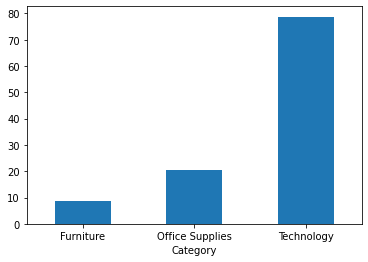

In [200]:
round(cat_g, 2).plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

In [215]:
df.plot(x = df['Category'].unique(),y=[df['Sales'].value_counts(), df['Profit'].mean()])
# plt.show()


KeyError: "None of [Index(['Furniture', 'Office Supplies', 'Technology'], dtype='object')] are in the [columns]"

In [152]:
#INFERENCE: Products in "Technology Category" are sold "less in number buy yields more profit" in comparison to other product categories

In [153]:
#7. Which type of shipping is commonly used and how it impacts profit

In [154]:
ship_g = df.groupby("Ship Mode").count()['Sales']
ship_g

Ship Mode
First Class       1538
Same Day           543
Second Class      1945
Standard Class    5968
Name: Sales, dtype: int64

In [155]:
ship_g = df.groupby('Ship Mode')['Profit'].mean()
round(ship_g, 2)

#INFERENCE: "Standard class" is the most preferred shipping mode, but the method of shipment has no significant impact in the profit

Ship Mode
First Class       31.84
Same Day          29.27
Second Class      29.54
Standard Class    27.49
Name: Profit, dtype: float64

In [156]:
#8. Find which segment corresponds to more sales and profit

In [157]:
df.groupby('Segment').count()['Sales']

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Sales, dtype: int64

In [158]:
round(df.groupby('Segment')['Profit'].mean(), 2)

#INFERENCE: There is a "Negative Relation" w.r.t segment sales and profit
# "Home Office" segment products sells very less but generates more profit compared to 
# "Consumer" segment that sells more products but generates lesser profit.

Segment
Consumer       25.84
Corporate      30.46
Home Office    33.82
Name: Profit, dtype: float64

In [159]:
#9. Which Region corresponds to more sales and profit

In [160]:
df.groupby('Region').count()['Sales']

Region
Central    2323
East       2848
South      1620
West       3203
Name: Sales, dtype: int64

In [161]:
round(df.groupby('Region')['Profit'].sum(), 2)

#INFERENCE: There is a "Positive correlation" observed in Region's sales and profit 
# West Region has higher sales with most profits whereas
# East Region has lower sales with lesser profit

Region
Central     39706.36
East        91522.78
South       46749.43
West       108418.45
Name: Profit, dtype: float64

In [162]:
#10. Find which sub-category corresponds to more sales and profit

In [163]:
df.groupby('Sub-Category').count().sort_values(by=['Sales'], ascending=False)['Sales']

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sales, dtype: int64

In [164]:
round(df.groupby('Sub-Category').mean(), 2).sort_values(by=['Profit'], ascending=False)['Profit']

#INFERENCE: "Binders" has more sales in terms of numbers whereas "Copiers" brings in more profit having the least sales
#No relation can be established from sales and profit from product sub-categories

Sub-Category
Copiers        817.91
Accessories     54.11
Phones          50.07
Chairs          43.10
Appliances      38.92
Machines        29.43
Envelopes       27.42
Storage         25.15
Paper           24.86
Binders         19.84
Labels          15.24
Furnishings     13.65
Art              8.20
Fasteners        4.38
Supplies        -6.26
Bookcases      -15.23
Tables         -55.57
Name: Profit, dtype: float64

In [165]:
#11. Does Quantity of purchase affect the sales operation and profit

In [166]:
df.groupby('Quantity').count().sort_values(by=['Sales'], ascending=False)['Sales']

Quantity
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Sales, dtype: int64

In [167]:
round(df.groupby('Quantity').mean(), 2).sort_values(by=['Profit'], ascending=False)['Profit']

#INFERENCE: Quantity of "2 and 3" has more number in sales whereas "13 and 11" has higher profits
#There is a "overall Positive Correlation" between quantity of purchase and profits 

Quantity
13    235.14
11    126.28
14     93.93
9      68.56
7      56.58
12     51.52
8      42.24
5      40.26
4      37.13
10     35.86
3      23.67
6      18.05
2      16.01
1       8.28
Name: Profit, dtype: float64

In [168]:
#12. Impact of Discount in Sales and profit

In [169]:
df.groupby('Discount').count().sort_values(by=['Sales'], ascending=False)['Sales']

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Sales, dtype: int64

In [170]:
round(df.groupby('Discount').mean(), 2).sort_values(by=['Profit'], ascending=False)['Profit']

#INFERENCE: Products with "No Discounts" has higher sales and 2nd highest profits 
# Products with 10% discounts has highest profit with lesser sales
# Higher discounts has comparatively similar sales numbers with 20+% discounts generates losses
# There is a "Overall Negative Correlation" observed with profit and discount

Discount
0.10     96.06
0.00     66.90
0.15     27.29
0.20     24.70
0.60    -43.08
0.30    -45.68
0.32    -88.56
0.70    -95.87
0.80   -101.80
0.40   -111.93
0.45   -226.65
0.50   -310.70
Name: Profit, dtype: float64

In [171]:
#13. Relationship between sales and profit

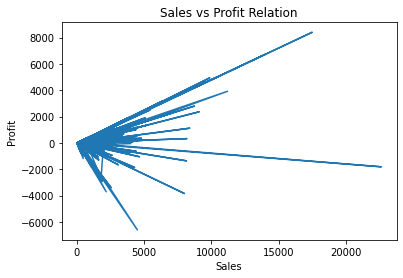

In [172]:
plt.plot(df['Sales'], df['Profit'])
plt.title('Sales vs Profit Relation')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

#INFERENCE: There is no relation found between Sales and Profit 

In [173]:
df1 = df.loc[df['Region']=='Central']
df2 = df.loc[df['Region']=='West']

In [174]:
df2.groupby('Discount').count().sort_values(by=['Sales'], ascending=False)['Sales']

Discount
0.00    1716
0.20    1317
0.70     100
0.15      52
0.50      18
Name: Sales, dtype: int64

In [175]:
round(df2.groupby('Discount').mean(), 2).sort_values(by=['Profit'], ascending=False)['Profit']

Discount
0.00     44.58
0.20     35.32
0.15     27.29
0.70   -117.09
0.50   -239.20
Name: Profit, dtype: float64

In [176]:
df1.groupby('Discount').count().sort_values(by=['Sales'], ascending=False)['Sales']

Discount
0.20    834
0.00    828
0.80    300
0.30    147
0.60    138
0.32     27
0.10     18
0.50     18
0.40     13
Name: Sales, dtype: int64

In [177]:
round(df1.groupby('Discount').mean(), 2).sort_values(by=['Profit'], ascending=False)['Profit']

Discount
0.10    106.56
0.00     91.94
0.20     16.85
0.60    -43.08
0.30    -44.50
0.32    -88.56
0.80   -101.80
0.40   -205.14
0.50   -239.43
Name: Profit, dtype: float64

In [178]:
# INFERENCES FROM ABOVE ANALYSIS

# 1. Product Disounts should be limited to 0% to 10%
# 2. More focus should be provided to increase sales of category Technology
# 3. More focus should be provided to increase sales of sub-category Copiers
# 4. More focus should be provided to increase sales of Home Office Segment products for higher profits
# 5. Increasing quantity of purchase increses profit generated
# 6. There are 116 cities and 10 states that have generated loss, so sales operations could be reduced and focused more on profit generating areas
# 7. Central Region has lesser profit compared to other region. 